In [2]:
#!pip3 install yfinance

This program will implement the Yahoo Finance Pyton API to retrieve the yohoo Finance Information.

# **The ***yfinance *** library offers Python users a seamless way to retrieve stock data from Yahoo Finance. Whether you're a beginner or a seasoned analyst, this library provides a range of functionalities to help you gather and analyze stock information. In this blog post, we will delve into 10 fundamental ways to retrieve stock data using ***yfinance***.**

**1. Fetching Historical Data**.         
The download method is your go-to for obtaining historical data for any stock.



In [71]:
import yfinance as yf
import logging as log
import datetime as dt
from concurrent.futures import ThreadPoolExecutor

# Configure the logger
log.basicConfig(level=log.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

# Log messages at different levels
log.debug('This is a debug message')

#Log setting for info
log.basicConfig(level=log.info)
log.getLogger().setLevel(log.INFO)

data = yf.download("AMZN AAPL GOOG MSFT NVDA META", start="2025-01-01", end="2025-06-10")

log.info(data.head())


[*********************100%***********************]  6 of 6 completed
INFO:root:Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2025-01-02  243.263199  220.220001  190.184464  598.707336  416.976868   
2025-01-03  242.774368  224.190002  192.678635  604.092529  421.728607   
2025-01-06  244.410416  227.610001  197.497345  629.639832  426.211365   
2025-01-07  241.627136  222.110001  196.250259  617.340759  420.752350   
2025-01-08  242.115936  222.130005  194.933350  610.177124  422.933990   

Price                         High                                      ...  \
Ticker            NVDA        AAPL        AMZN        GOOG        META  ...   
Date                                                                    ...   
2025-01-02  138.287674  248.500565  225.149994  192.748449  604.372279  ...   
2025-01-03  

#Testing Purpose

In [39]:
def get_stats(ticker):
    info = yf.Tickers(ticker).tickers[ticker].info
    print(f"{ticker} {info['currentPrice']} {info['marketCap']}")

ticker_list = ['AAPL', 'ORCL', 'PREM.L', 'UKOG.L', 'KOD.L', 'TOM.L', 'VELA.L', 'MSFT', 'AMZN', 'GOOG']

with ThreadPoolExecutor() as executor:
    executor.map(get_stats, ticker_list)

AAPL 196.45 2934137946112
PREM.L 0.0122 5669047
TOM.L 0.0475 1854466
ORCL 215.22 603526332416
KOD.L 0.261 52845716
UKOG.L 0.0102 1675268
MSFT 474.96 3530159292416
AMZN 212.1 2251738578944
GOOG 175.88 2126178287616


**2. Ticker Object**.                  
The Ticker class allows you to access various data for a specific stock.



In [53]:
def get_stats(ticker):
    result = yf.Tickers(ticker).tickers[ticker].info

    log.info(f"{ticker} {result['displayName']}")
    # General display name about Inc.

#AMZN AAPL GOOG MSFT NVDA
ticker_list = ['AAPL','MSFT', 'AMZN', 'GOOG','NVDA',"META" ]

with ThreadPoolExecutor() as executor:
    executor.map(get_stats, ticker_list)



INFO:root:NVDA NVIDIA
INFO:root:MSFT Microsoft
INFO:root:AAPL Apple
INFO:root:AMZN Amazon.com
INFO:root:GOOG Alphabet
INFO:root:META Meta Platforms


**3. Getting Recent Data**              
Want data for the most recent trading days? Here’s how:

In [59]:
multi_data = yf.download(["AAPL","AMZN" , 'GOOG'], start="2025-05-01", end="2025-06-10")
log.info(multi_data)

[*********************100%***********************]  3 of 3 completed
INFO:root:Price            Close                                High              \
Ticker            AAPL        AMZN        GOOG        AAPL        AMZN   
Date                                                                     
2025-05-01  213.040634  190.199997  162.594559  214.279000  191.809998   
2025-05-02  205.081070  189.979996  165.610931  206.718922  192.880005   
2025-05-05  198.629532  186.350006  165.850647  203.832716  188.179993   
2025-05-06  198.250015  185.009995  165.001663  200.387212  187.929993   
2025-05-07  195.992981  188.710007  152.616562  199.178806  190.990005   
2025-05-08  197.231369  192.080002  155.563019  199.788014  194.330002   
2025-05-09  198.270004  193.059998  154.194656  200.277366  194.690002   
2025-05-12  210.789993  208.639999  159.388412  211.270004  211.660004   
2025-05-13  212.929993  211.369995  160.696838  213.399994  214.839996   
2025-05-14  212.330002  210.25000

**4. Fetching Data for Multiple Tickers**     
Retrieve data for multiple stocks in one go

In [66]:
#data = yf.download("AAPL", start="2025-06-01", end="2025-06-10", auto_adjust=True)
#log.info(data['Close'])  # This will show the adjusted close prices

#AMZN AAPL GOOG MSFT NVDA
ticker_list = ['AAPL','AMZN','GOOG']
data = yf.download(ticker_list, start="2025-05-01", end="2025-06-10", auto_adjust=True)
log.info(data['Close'])  # This will show the adjusted close prices


[*********************100%***********************]  3 of 3 completed
INFO:root:Ticker            AAPL        AMZN        GOOG
Date                                          
2025-05-01  213.040634  190.199997  162.594559
2025-05-02  205.081070  189.979996  165.610931
2025-05-05  198.629532  186.350006  165.850647
2025-05-06  198.250015  185.009995  165.001663
2025-05-07  195.992981  188.710007  152.616562
2025-05-08  197.231369  192.080002  155.563019
2025-05-09  198.270004  193.059998  154.194656
2025-05-12  210.789993  208.639999  159.388412
2025-05-13  212.929993  211.369995  160.696838
2025-05-14  212.330002  210.250000  166.609726
2025-05-15  211.449997  205.169998  165.201416
2025-05-16  211.259995  205.589996  167.228989
2025-05-19  208.779999  206.160004  167.668457
2025-05-20  206.860001  204.070007  165.121536
2025-05-21  202.089996  201.119995  169.855835
2025-05-22  201.360001  203.100006  171.773529
2025-05-23  195.270004  200.990005  169.386398
2025-05-27  200.210007  206.

**5. Adjusted Data Retrieval**.          
Obtain adjusted data, which accounts for stock splits, dividends, etc.

In [58]:
monthly_data = yf.download("AMZN AAPL GOOG", start="2024-01-01", end="2025-06-10", interval="1mo" )
log.info(monthly_data)

[*********************100%***********************]  3 of 3 completed
INFO:root:Price            Close                                High              \
Ticker            AAPL        AMZN        GOOG        AAPL        AMZN   
Date                                                                     
2024-01-01  183.059433  155.199997  140.962112  194.952351  161.729996   
2024-02-01  179.435959  176.759995  138.954025  189.661082  177.220001   
2024-03-01  170.450577  180.380005  151.360306  179.446251  181.699997   
2024-04-01  169.307495  175.000000  163.667130  177.289289  189.770004   
2024-05-01  191.095917  176.440002  172.932053  191.841414  191.699997   
2024-06-01  209.639572  193.250000  182.336166  219.174980  199.839996   
2024-07-01  221.046234  186.979996  172.322708  236.125706  201.199997   
2024-08-01  227.934036  178.500000  164.321136  231.835787  190.600006   
2024-09-01  232.183838  186.330002  166.391205  232.273519  195.369995   
2024-10-01  225.118683  186.39999

**7. Retrieving Dividends and Splits**       
Access dividend and stock split history.

In [75]:
# Define the list of stock symbols
stock_list = ["AAPL", "AMZN", "GOOG"]

# Define the start and end dates
start_date = dt.datetime(2025, 1, 1)
end_date = dt.datetime(2025, 6, 1)

# Download the data
data = yf.download(stock_list, start=start_date, end=end_date)

# Access dividend data (if available)
for stock in stock_list:
    try:
        dividends = yf.Ticker(stock).dividends
        log.info(f"Dividends for {stock}:")
        log.info(dividends)
    except Exception as e:
        log.debug(f"Could not retrieve dividends for {stock}: {e}")

[*********************100%***********************]  3 of 3 completed
INFO:root:Dividends for AAPL:
INFO:root:Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
Name: Dividends, Length: 87, dtype: float64
INFO:root:Dividends for AMZN:
INFO:root:Series([], Name: Dividends, dtype: float64)
INFO:root:Dividends for GOOG:
INFO:root:Date
2024-06-10 00:00:00-04:00    0.20
2024-09-09 00:00:00-04:00    0.20
2024-12-09 00:00:00-05:00    0.20
2025-03-10 00:00:00-04:00    0.20
2025-06-09 00:00:00-04:00    0.21
Name: Dividends, dtype: float64


In [69]:
apple = yf.Tickers("AAPL GOOG AMZN")
log.info(apple.history(period="1d"))

[*********************100%***********************]  3 of 3 completed
INFO:root:Price            Close                         Dividends            \
Ticker            AAPL        AMZN        GOOG      AAPL AMZN GOOG   
Date                                                                 
2025-06-13  196.449997  212.100006  175.880005       0.0  0.0  0.0   

Price             High                                 Low  ...              \
Ticker            AAPL        AMZN        GOOG        AAPL  ...        GOOG   
Date                                                        ...               
2025-06-13  200.369995  214.050003  178.343002  195.699997  ...  173.570007   

Price             Open                         Stock Splits            \
Ticker            AAPL        AMZN        GOOG         AAPL AMZN GOOG   
Date                                                                    
2025-06-13  199.729996  209.960007  173.580002          0.0  0.0  0.0   

Price         Volume          

**9. Data for Specific Dates**.         
Obtain data for a specific date range

In [67]:
data = yf.download("AAPL GOOG AMZN", start="2025-01-01", end="2025-06-10")
log.info(data)


[*********************100%***********************]  3 of 3 completed
INFO:root:Price            Close                                High              \
Ticker            AAPL        AMZN        GOOG        AAPL        AMZN   
Date                                                                     
2025-01-02  243.263199  220.220001  190.184464  248.500565  225.149994   
2025-01-03  242.774368  224.190002  192.678635  243.592387  225.360001   
2025-01-06  244.410416  227.610001  197.497345  246.734810  228.839996   
2025-01-07  241.627136  222.110001  196.250259  244.959095  228.380005   
2025-01-08  242.115936  222.130005  194.933350  243.123515  223.520004   
...                ...         ...         ...         ...         ...   
2025-06-03  203.270004  205.710007  167.508667  203.770004  208.949997   
2025-06-04  202.820007  207.229996  169.186630  206.240005  208.179993   
2025-06-05  200.630005  207.910004  169.606125  204.750000  212.809998   
2025-06-06  203.919998  213.57000

**10. Visualization with yfinance**.  
Visualize historical data with ease.

[*********************100%***********************]  3 of 3 completed


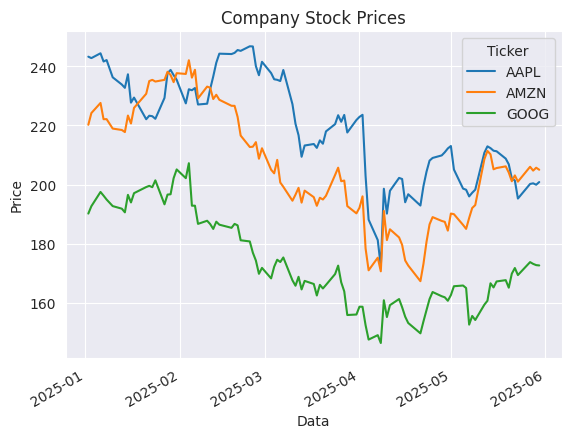

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data = yf.download("AAPL GOOG AMZN", start="2025-01-01", end="2025-06-01")
data['Close'].plot()

# create a histogram using seaborn
sns.set_style("darkgrid")


plt.xlabel("Data")
plt.ylabel("Price")
plt.title("Company Stock Prices")
plt.show()